In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### OUR ALL Stapes

## ✅ 1. Data Cleaning

In [3]:
df.isnull().mean()*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [4]:
## Drop last 3 Columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
## Renaming columns

df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df.isnull().mean()*100

Target    0.0
Text      0.0
dtype: float64

In [51]:
df.duplicated().sum()

np.int64(403)

In [9]:
df=df.drop_duplicates(keep='first')
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### ✅ 2.EDA 

In [10]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

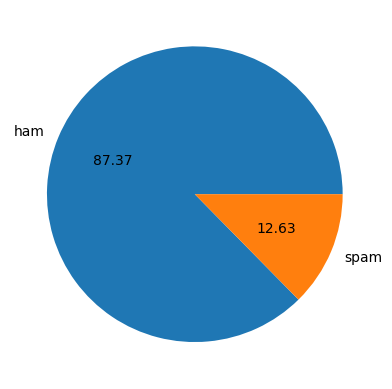

In [226]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

## Data is Imbalanced

In [11]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adarsh1728\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Number of Characters

In [17]:
df['Num_Characters']=df['Text'].apply(len)
df

C:\Users\Adarsh1728\AppData\Local\Temp\ipykernel_56420\3475763492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Characters']=df['Text'].apply(len)


,Target,Text,Num_Characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,42
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,28


### Numbers of Words

df['Num_Words']=df['Text'].apply(lambda x:len(nltk.wordpunct_tokenize(x)))
df

In [18]:
df[['Num_Characters','Num_Words']].describe()

,Num_Characters,Num_Words
count,5169.000000,5169.000000
mean,78.977945,19.202747
std,58.236293,13.963696
min,2.000000,1.000000
25%,36.000000,9.000000
50%,60.000000,15.000000
75%,117.000000,28.000000
max,910.000000,210.000000


C:\Users\Adarsh1728\AppData\Local\Temp\ipykernel_56420\1827496461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Target']==0][['Num_Characters']],label='Characters')
C:\Users\Adarsh1728\AppData\Local\Temp\ipykernel_56420\1827496461.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

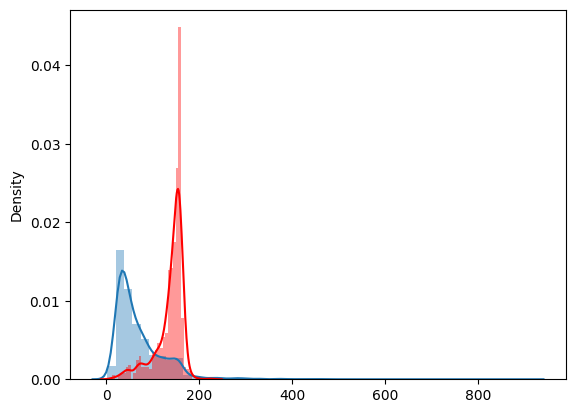

In [20]:
## Distribution

sns.distplot(df[df['Target']==0][['Num_Characters']],label='Characters')
sns.distplot(df[df['Target']==1][['Num_Characters']],color='red',label='Characters')
plt.show()


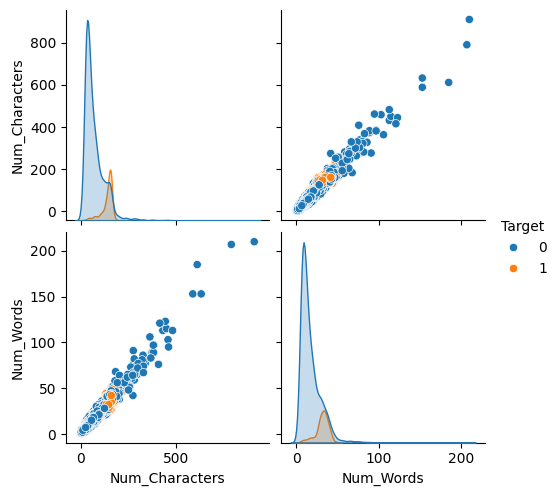

In [21]:
sns.pairplot(data=df,hue='Target')

<Axes: >

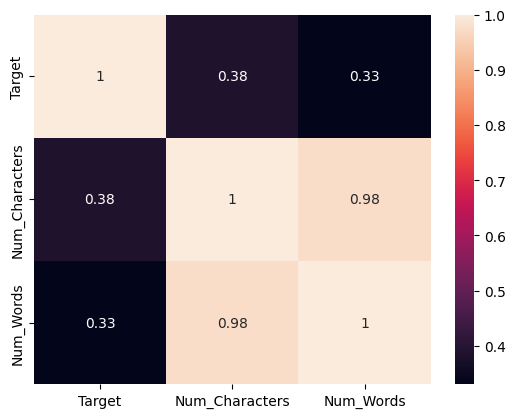

In [22]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [80]:
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

import string
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = text.split()  # Split into words
    y = [word for word in text if word.isalnum()]  # Keep only alphanumeric words

    text=y[:]
    y.clear()

    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    

    text=y[:]
    y.clear()
    for word in text:
        y.append(ps.stem(word))
        
    return " ".join(y)


print(transform_text('I loved YT lecture on machine learning.How about you?'))



love yt lectur machin


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adarsh1728\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
df['Transformed_text']=df['Text'].apply(transform_text)
df

C:\Users\Adarsh1728\AppData\Local\Temp\ipykernel_56420\602494731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text']=df['Text'].apply(transform_text)


,Target,Text,Num_Characters,Num_Words,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,nah think goe live around though
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,42,2nd time tri 2 contact u pound 2 claim call 08...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,b go esplanad fr
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,mood
5570,0,The guy did some bitching but I acted like i'd...,125,28,guy bitch act like interest buy someth els nex...


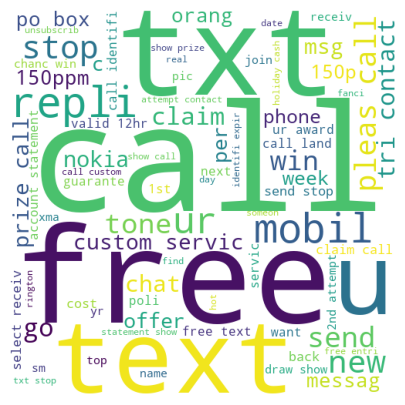

In [66]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
# Filter spam messages and join them into a single string
# Spam_text  = df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" ")
Spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))

# Display it
plt.figure(figsize=(10,5))
plt.imshow(Spam_wc)
plt.axis('off')
plt.show()

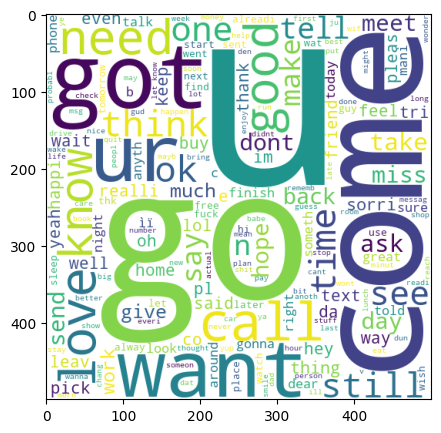

In [67]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))

# Display it
plt.figure(figsize=(5,5))
plt.imshow(ham_wc)
plt.show()

## 3. Model Building

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [105]:
Tfidf = TfidfVectorizer(max_features=3000)
x=Tfidf.fit_transform(df['Transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [94]:
y=df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

mnb=MultinomialNB()

mnb.fit(x_train,y_train)

y_pridict=mnb.predict(x_test)
y_pridict

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [96]:
print("Accuracy Score:",accuracy_score(y_test,y_pridict))
print("confusion_matrix:",confusion_matrix(y_test,y_pridict))
print("precision_score:",precision_score(y_test,y_pridict))

Accuracy Score: 0.9671179883945842
confusion_matrix: [[434   9]
 [  8  66]]
precision_score: 0.88


In [115]:
import pickle

pickle.dump(Tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
